In [1]:
import pandas as pd
import numpy as np
# import matplotlib
import plotly.express as px
import datetime
from IPython.display import Markdown as md
# pd.options.plotting.backend = "plotly"
# look at plotly(express or pandas) for plotting backend

In [2]:
filepath = '/Users/el_zagales/Desktop/results-20200620-135031.csv'
df = pd.read_csv(filepath, parse_dates=[6,7,8,9])

In [3]:
rows = len(df.index)
num_columns = len(df.columns)
columns = df.columns
print('General:')
df.info(memory_usage='deep')
print('NULL Distribution:')
df.isnull().sum()

General:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   unique_key                10000 non-null  object             
 1   complaint_type            9999 non-null   object             
 2   complaint_description     9999 non-null   object             
 3   owning_department         9999 non-null   object             
 4   source                    9999 non-null   object             
 5   status                    9999 non-null   object             
 6   status_change_date        9896 non-null   datetime64[ns, UTC]
 7   created_date              9896 non-null   datetime64[ns, UTC]
 8   last_update_date          9896 non-null   datetime64[ns, UTC]
 9   close_date                8604 non-null   datetime64[ns, UTC]
 10  incident_address          9999 non-null   object             
 11  street_

unique_key                     0
complaint_type                 1
complaint_description          1
owning_department              1
source                         1
status                         1
status_change_date           104
created_date                 104
last_update_date             104
close_date                  1396
incident_address               1
street_number               2093
street_name                    2
city                          77
incident_zip                  25
county                        38
state_plane_x_coordinate       1
state_plane_y_coordinate       2
latitude                       1
longitude                      1
location                       1
council_district_code       3196
map_page                      21
map_tile                     175
dtype: int64

In [1]:
df[df.map_page.isnull()]

NameError: name 'df' is not defined

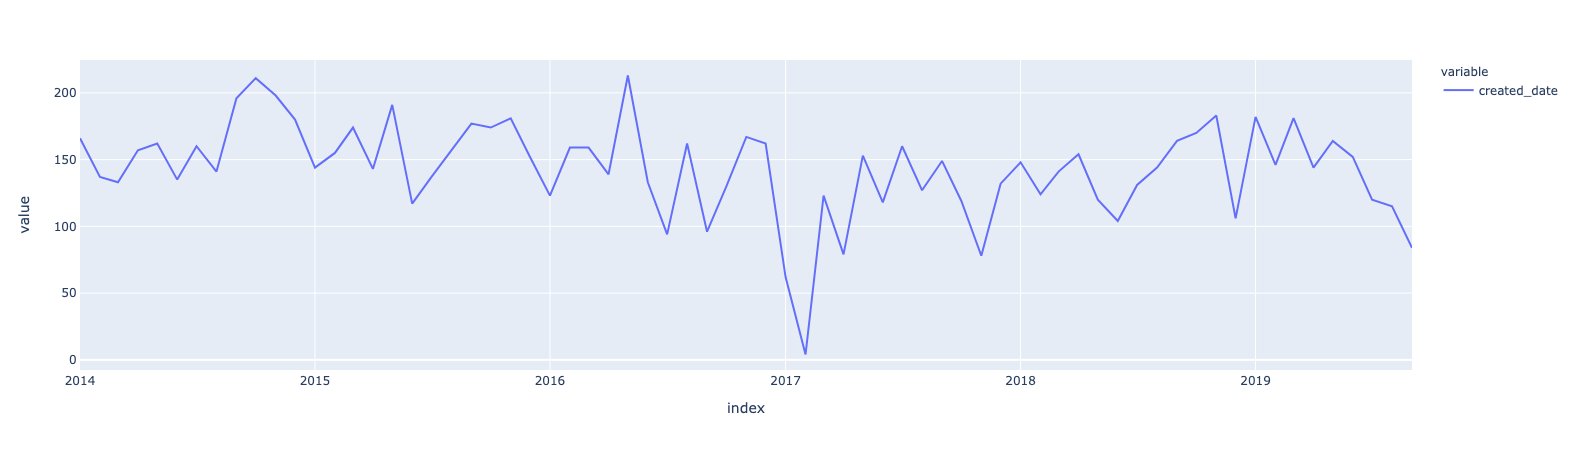

In [10]:
cd_df = df['created_date'].to_frame()
cd_df = cd_df['created_date'].dt.to_period('M')
cd_str = cd_df.astype(str)
created_date_dist = cd_str.value_counts()
created_date_dist = created_date_dist.sort_index()
fig = px.line(data_frame=created_date_dist)
fig.show()

/Users/el_zagales/.local/share/virtualenvs/data-analysis-hNV57Y1b/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



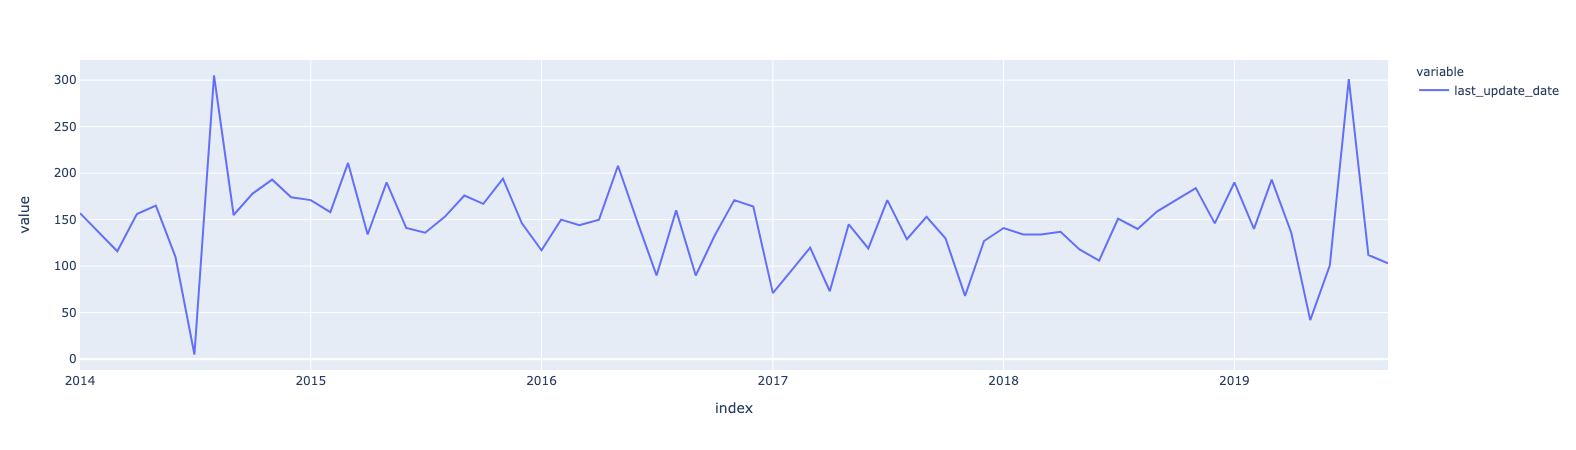

In [11]:
lu_df = df['last_update_date'].to_frame()
lu_df = lu_df['last_update_date'].dt.to_period('M')
lu_str = lu_df.astype(str)
last_update_date_dist = lu_str.value_counts()
last_update_date_dist = last_update_date_dist.sort_index()
fig = px.line(data_frame=last_update_date_dist)
fig.show()

AUSTIN           8350
PFLUGERVILLE      769
Austin            154
MANOR             116
LEANDER           107
OTHER              67
LAKEWAY            51
Pflugerville       39
CEDAR PARK         39
BRIARCLIFF         31
JONESTOWN          30
SPICEWOOD          28
LAGO VISTA         28
AUSTIN 5 ETJ       26
COUPLAND           17
ROUND ROCK         14
Manor               9
TRAVIS              8
Leander             8
GEORGETOWN          5
HUTTO               5
Marble Falls        3
austin              3
VOLENTE             3
POINT VENTURE       3
leander             2
Cedar Park          2
Elgin               1
HAYS                1
Coupland            1
THE HILLS           1
Spicewood           1
ELGIN               1
Name: city, dtype: int64


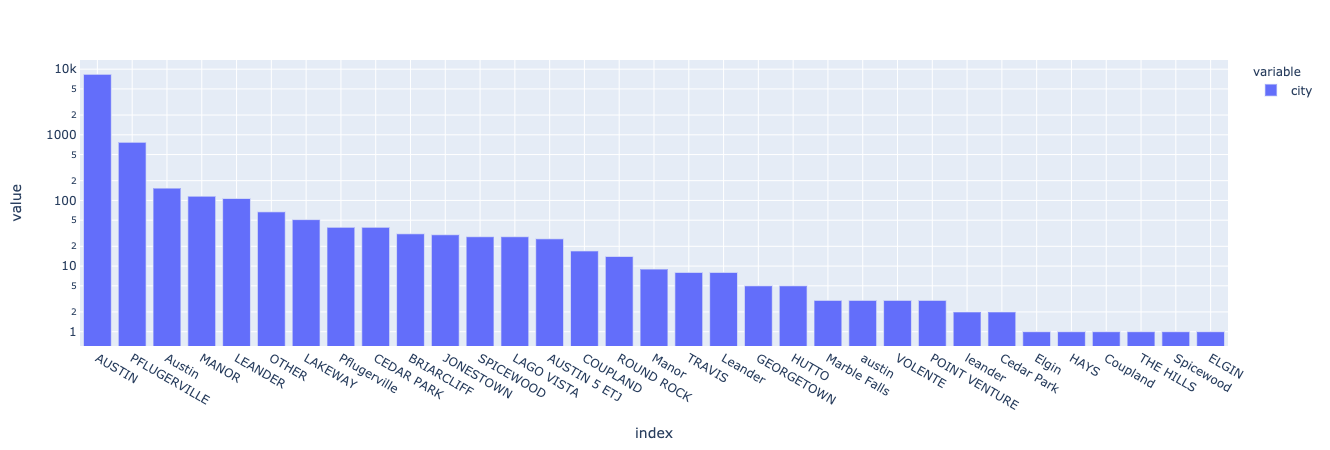

In [13]:
city_dist = df['city'].value_counts()
print(city_dist)
fig = px.bar(data_frame=city_dist, log_y=True)
fig.show()

In [39]:
city_unique = pd.Series(df['city'].unique())
city_lower = city_unique.str.lower().value_counts()
print(city_lower)

austin           3
leander          3
cedar park       2
spicewood        2
pflugerville     2
manor            2
coupland         2
elgin            2
lakeway          1
point venture    1
austin 5 etj     1
marble falls     1
the hills        1
lago vista       1
volente          1
hays             1
travis           1
hutto            1
georgetown       1
round rock       1
other            1
briarcliff       1
jonestown        1
dtype: int64
